- Consider again the mtcars dataset. Use a two-group t − test to test the hypothesis that the 4 and 6 cyl cars have the same
mpg. Do you reject or fail to reject the H ? And why?
You believe the coin that you’re flipping is biased towards heads. You get 55 heads out of 100 flips. Do you reject at the 5% level
that the coin is fair?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats

In [ ]:
import vega_datasets as vd

df_cars = vd.data('cars')

In [ ]:
# that the 4 and 6 cyl cars have the same 'mpg'

In [8]:
df_cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [23]:
sns.set_style('darkgrid')
sns.set_context('notebook')

In [29]:
srs_cyl4_mpg = df_cars.query("Cylinders == 4").loc[:, 'Miles_per_Gallon'].dropna()
srs_cyl8_mpg = df_cars.query("Cylinders == 6").loc[:, 'Miles_per_Gallon'].dropna()

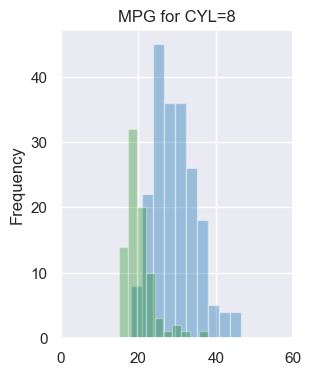

In [30]:
ax = srs_cyl4_mpg.dropna().plot.hist(title='MPG for CYL=4', figsize=(3, 4), xlim=(0, 60), alpha=0.4)
srs_cyl8_mpg.plot.hist(title='MPG for CYL=8', figsize=(3, 4), color='green', ax=ax, alpha=0.3);

In [34]:
srs_cyl4_mpg.var().round(1), srs_cyl8_mpg.var().round(1)

(np.float64(32.6), np.float64(14.5))

In [36]:
srs_cyl4_mpg.mean().round(1) - srs_cyl8_mpg.mean().round(1)

np.float64(9.3)

In [35]:
stats.ttest_ind(a=srs_cyl4_mpg, b=srs_cyl8_mpg)

TtestResult(statistic=np.float64(13.718631345338444), pvalue=np.float64(2.947920641313147e-33), df=np.float64(286.0))

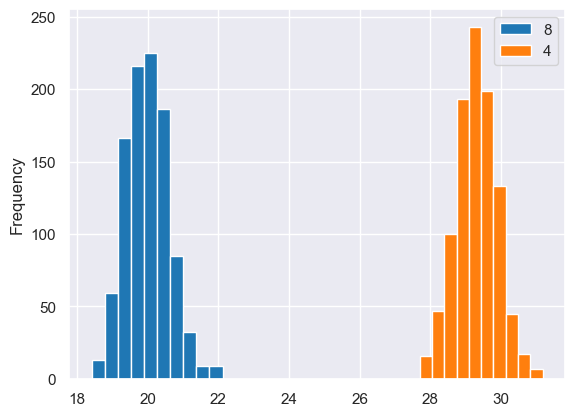

In [66]:
ax = pd.Series([srs_cyl8_mpg.sample(frac=.5, replace=True).mean() for x in range(1000)]).plot.hist(label='8')
pd.Series([srs_cyl4_mpg.sample(frac=.5, replace=True).mean() for x in range(1000)]).plot.hist(label='4', ax=ax)

ax.legend()

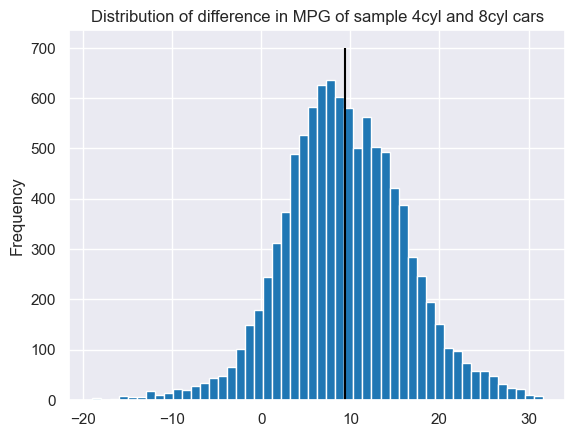

In [81]:
srs = pd.Series([(srs_cyl4_mpg.sample(1).iloc[0] - srs_cyl8_mpg.sample(1).iloc[0]) for x in range(10_000)])
ax = srs.plot.hist(bins=50, title="Distribution of difference in MPG of sample 4cyl and 8cyl cars")
ax.vlines(x=srs.mean(), ymin=0, ymax=700, color='black');

<br>

# You believe the coin that you’re flipping is biased towards heads. You get 59 heads out of 100 flips. 
# Do you reject at the 5% level that the coin is fair?

<br>

In [ ]:
srs_fair_coin = pd.Series(data=[stats.binom(n=1, p=0.5).rvs(100).mean() for x in range(10_000)], name='fair coin')

In [115]:
srs_unfair_coin = pd.Series(data=[stats.binom(n=1, p=0.6).rvs(100).mean() for x in range(10_000)], name='unfair')

<Axes: ylabel='Frequency'>

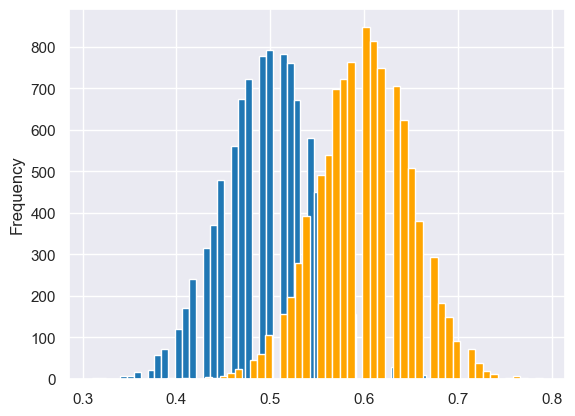

In [116]:
ax = srs_fair_coin.plot.hist(bins=50)
srs_unfair_coin.plot.hist(bins=50, ax=ax, color='orange')

<Axes: ylabel='Frequency'>

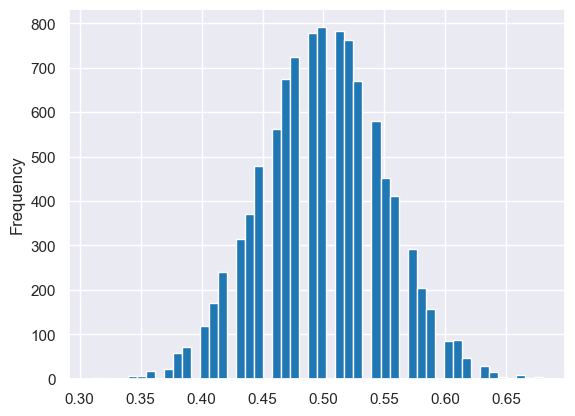

In [118]:
srs_fair_coin.plot.hist(bins=50)

In [121]:
stats.norm.fit?

Signature: stats.norm.fit(data, **kwds)
Docstring:
Return estimates of shape         For the normal distribution, method of moments and maximum likelihood
        estimation give identical fits, and explicit formulas for the estimates
        are available.
        This function uses these explicit formulas for the maximum likelihood
        estimation of the normal distribution parameters, so the
        `optimizer` and `method` arguments are ignored.
File:      ~/Code/cst4150/.fintech/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py
Type:      method

In [122]:
mu, si = stats.norm.fit(srs_fair_coin.values)

In [130]:
stats.norm(loc=mu, scale=si).pdf(x=0.59)

np.float64(1.5645562788612541)

In [6]:
df_cars[['Miles_per_Gallon', 'Weight_in_lbs']].corr()

,Miles_per_Gallon,Weight_in_lbs
Miles_per_Gallon,1.000000,-0.831741
Weight_in_lbs,-0.831741,1.000000


In [12]:
df_cars.select_dtypes(include=np.number).corr().round(2).replace(1, '')

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
Miles_per_Gallon,,-0.78,-0.8,-0.78,-0.83,0.42
Cylinders,-0.78,,0.95,0.84,0.9,-0.52
Displacement,-0.8,0.95,,0.9,0.93,-0.56
Horsepower,-0.78,0.84,0.9,,0.87,-0.7
Weight_in_lbs,-0.83,0.9,0.93,0.87,,-0.43
Acceleration,0.42,-0.52,-0.56,-0.7,-0.43,


<Axes: >

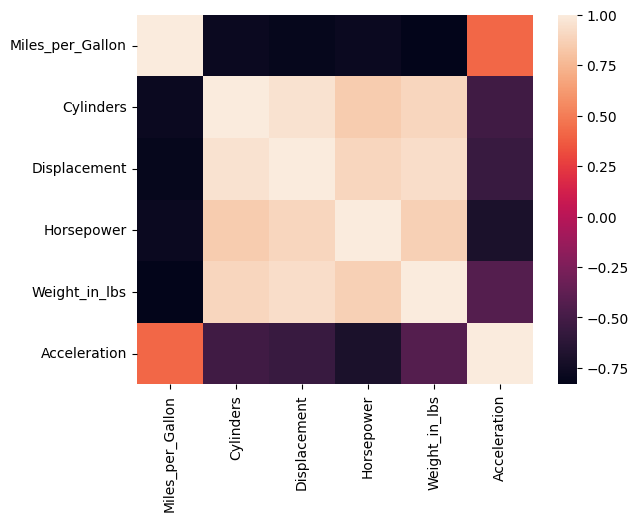

In [10]:
sns.heatmap(data=df_cars.select_dtypes(include=np.number).corr())